In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

import joblib
import pandas as pd
import numpy as np
import re
import os
import pickle
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("../../traindata_2015_2018_beforeCovid.csv")
df_test = pd.read_csv("../../testdata_2019_beforeCovid.csv")

In [3]:
# train set
reviews_train = list(df_train["clean_review"])
sentiments_train = list(df_train["sentiment"])
# test set
reviews_test = list(df_test["clean_review"])
sentiments_test = list(df_test["sentiment"])

In [4]:
# tfidf embedding
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='char', sublinear_tf=True, ngram_range=(1,3), max_features=5000)

X_train = vectorizer.fit_transform(reviews_train)
y_train = np.array(sentiments_train)

X_test = vectorizer.transform(reviews_test)
y_test = np.array(sentiments_test)

In [5]:
nb = BernoulliNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

In [6]:
print("Accuracy: %f" % accuracy_score(y_test, nb_pred))

Accuracy: 0.741343


Text(0.5, 257.44, 'Predicted label')

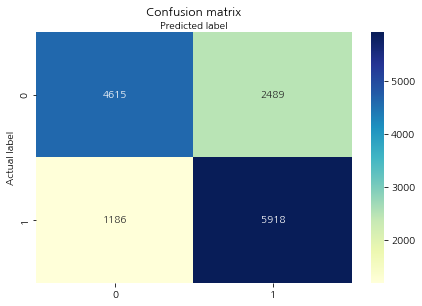

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, nb_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))
print("Precision:",metrics.precision_score(y_test, nb_pred))
print("Recall:",metrics.recall_score(y_test, nb_pred))
print("F1-score:",metrics.f1_score(y_test, nb_pred))

Accuracy: 0.7413429054054054
Precision: 0.7039371951944808
Recall: 0.8330518018018018
F1-score: 0.7630713687060796


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, nb_pred, target_names=['class low', 'class high']))

              precision    recall  f1-score   support

   class low       0.80      0.65      0.72      7104
  class high       0.70      0.83      0.76      7104

    accuracy                           0.74     14208
   macro avg       0.75      0.74      0.74     14208
weighted avg       0.75      0.74      0.74     14208



In [11]:
report = classification_report(y_test, nb_pred, target_names=['class low', 'class high'], output_dict=True)
df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
class low,0.795552,0.649634,0.715227,7104.000000
class high,0.703937,0.833052,0.763071,7104.000000
accuracy,0.741343,0.741343,0.741343,0.741343
macro avg,0.749745,0.741343,0.739149,14208.000000
weighted avg,0.749745,0.741343,0.739149,14208.000000


In [12]:
joblib.dump(nb, 'nb_TFIDF_beforeCovid_0.741343.pkl')

['nb_TFIDF_beforeCovid_0.741343.pkl']